<a href="https://colab.research.google.com/github/Permanganant/Contrast-Sensitivity-Estimation/blob/main/data_analysis_cfe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import sys

In [ ]:
data = pd.read_csv('my_data_df_2.csv')

In [ ]:
data

,user_answer,contrast_value,spatial_freq
0,y,0.010000,10.000000
1,y,0.215443,1.000000
2,y,0.215443,4.641589
3,n,0.010000,100.000000
4,y,0.464159,46.415888
...,...,...,...
195,y,0.100000,2.154435
196,y,0.046416,0.215443
197,y,0.046416,21.544347
198,y,0.046416,0.464159


In [ ]:
sf_arr = data['spatial_freq']
uni_sf = np.unique(sf_arr)

In [ ]:
contrast_arr = data['contrast_value']
uni_contrast = np.unique(contrast_arr)

In [ ]:
df = data[data['spatial_freq'] == uni_sf[1]]
df

,user_answer,contrast_value,spatial_freq
6,n,0.002154,0.215443
16,y,0.002154,0.215443
26,y,0.021544,0.215443
36,y,0.100000,0.215443
46,y,0.002154,0.215443
56,y,0.046416,0.215443
66,y,0.464159,0.215443
76,y,0.215443,0.215443
86,y,0.002154,0.215443
96,y,0.464159,0.215443


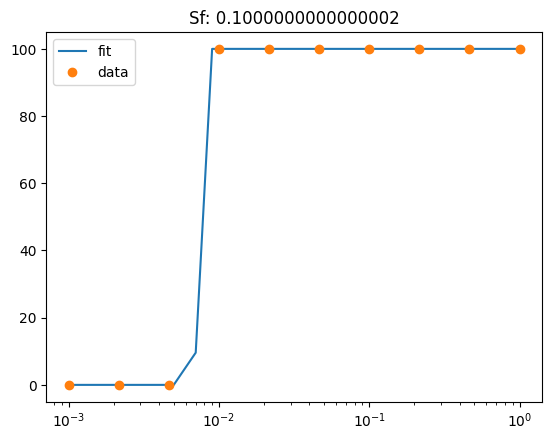

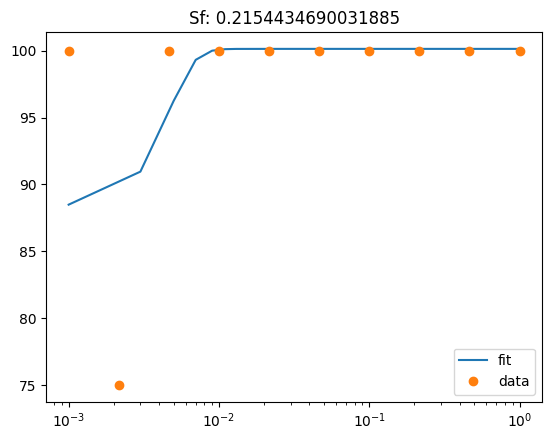

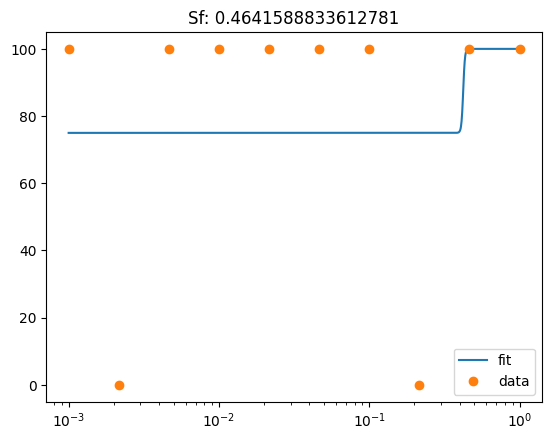

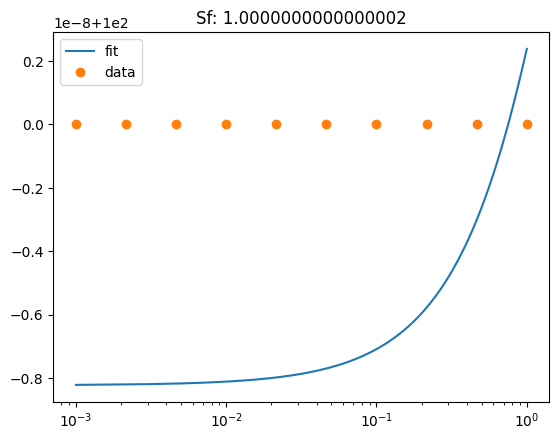

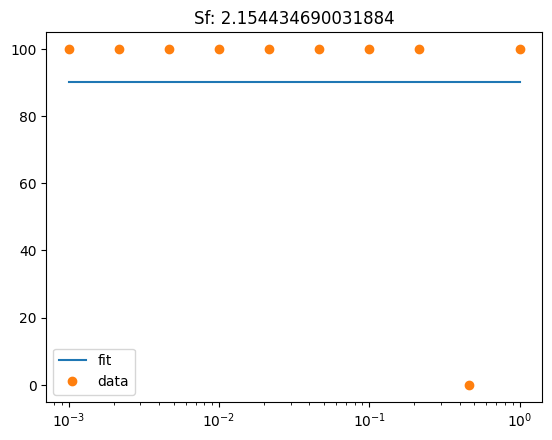

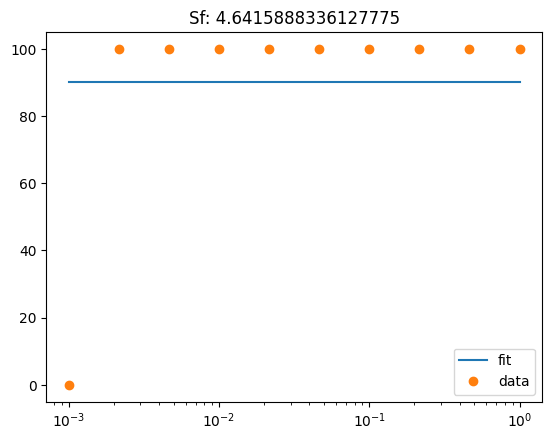

RuntimeError: ignored

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

th = []

for j in uni_sf:
  df = data[data['spatial_freq'] == j]
  percent = []
  for i in uni_contrast:
    indx_con = df['contrast_value'] == i
    pos =np.count_nonzero(df['user_answer'][indx_con] == 'y')
    neg = np.count_nonzero(df['user_answer'][indx_con] == 'n')
    total = pos + neg + sys.float_info.epsilon
    tp = pos*100/total
    percent.append(tp)
  
  ydata = percent

  #xdata = range(0,len(ydata),1)
  #lin_values = np.linspace(uni_contrast[0], uni_contrast[-1], len(uni_contrast))

  xdata = uni_contrast
  def sigmoid(x,L,x0, k,b):
    #sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) +b
    #y = L / (1 + np.exp(-k*(x-x0))) + b
    #y = 0.25+(0.75)*L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

  p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess
  #p0 = [0.75, np.median(xdata),1,0.25] # this is an mandatory initial guess
  #p0 = [0.75,np.median(xdata),1,0.25] # this is an mandatory initial guess

  popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='trf',maxfev=50000)
  #x = np.linspace(0, 10, 500)
  x = np.linspace(xdata[0], xdata[-1], 500)
  y = sigmoid(x, *popt)
  indx = find_nearest(y, value=(max(ydata)+min(ydata))/2)
  th.append(x[indx])
  plt.semilogx(x, y,label='fit')
  plt.title("Sf: "+ str(j))
  plt.plot(xdata, ydata, 'o', label='data')
  #plt.plot(x,y, label='fit')
  #plt.ylim(0, 1.3)
  plt.legend(loc='best')
  plt.show()

In [ ]:
th

[0.007006012024048097, 0.001, 0.001, 0.7517515030060121, 0.001, 0.001]

In [ ]:
plt.plot(th)